In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [128]:
data = pd.read_csv('C:\\Users\ATUL\\Desktop\\EDA python\\machine learning\\diamond data\\diamonds.csv')
data


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [129]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [131]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [132]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [133]:
data =data.drop(['Unnamed: 0'],axis= 1)

In [134]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [135]:
numeric_data = data.select_dtypes(include= [float,int])

In [136]:
numeric_data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


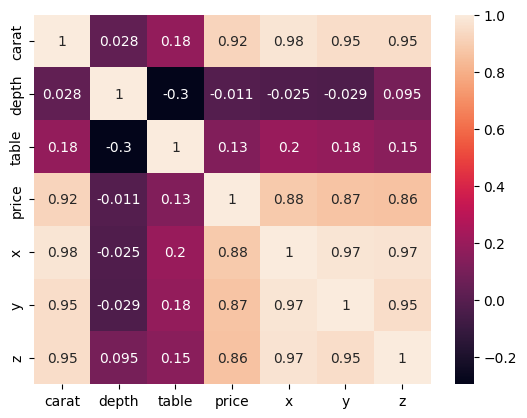

In [137]:
sns.heatmap(numeric_data.corr(),annot= True)
plt.show()

Since carat has high correlation with x, y z we can drop it.
Similarly x, y, and z have high correlation so we dropped x and y from our model.

In [138]:
data.drop(['carat','x','y'], axis=1)

,cut,color,clarity,depth,table,price,z
0,Ideal,E,SI2,61.5,55.0,326,2.43
1,Premium,E,SI1,59.8,61.0,326,2.31
2,Good,E,VS1,56.9,65.0,327,2.31
3,Premium,I,VS2,62.4,58.0,334,2.63
4,Good,J,SI2,63.3,58.0,335,2.75
...,...,...,...,...,...,...,...
53935,Ideal,D,SI1,60.8,57.0,2757,3.50
53936,Good,D,SI1,63.1,55.0,2757,3.61
53937,Very Good,D,SI1,62.8,60.0,2757,3.56
53938,Premium,H,SI2,61.0,58.0,2757,3.74


In [139]:
data[['depth','table','price',"z"]].describe()

,depth,table,price,z
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,61.749405,57.457184,3932.799722,3.538734
std,1.432621,2.234491,3989.439738,0.705699
min,43.000000,43.000000,326.000000,0.000000
25%,61.000000,56.000000,950.000000,2.910000
50%,61.800000,57.000000,2401.000000,3.530000
75%,62.500000,59.000000,5324.250000,4.040000
max,79.000000,95.000000,18823.000000,31.800000


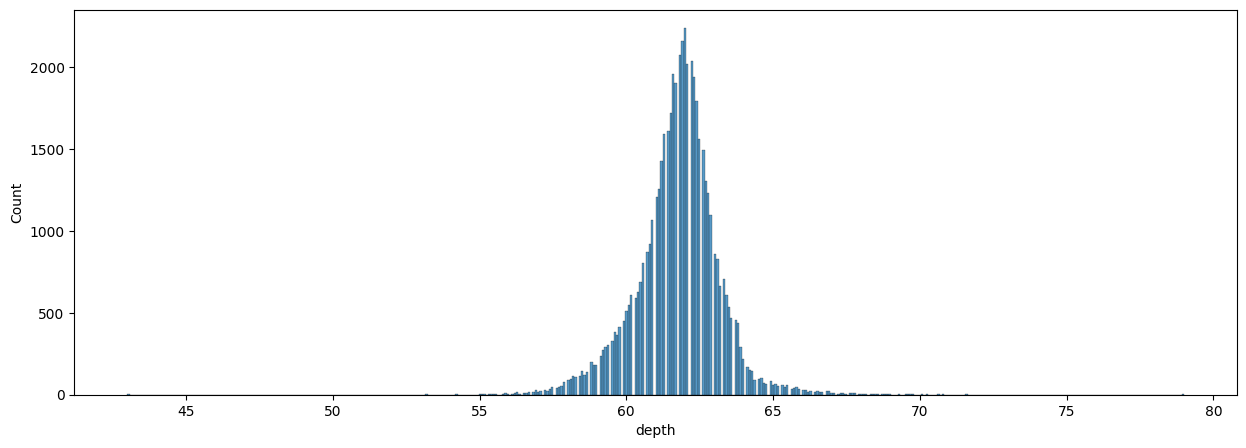

In [140]:
plt.figure(figsize=(15,5))
sns.histplot(x = 'depth', data = data)
plt.show()

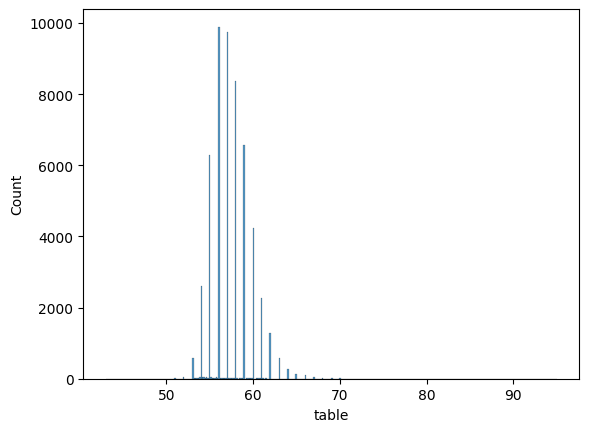

In [141]:
plt.Figure(figsize=(15,5))
sns.histplot(x= 'table',data = data)
plt.show()

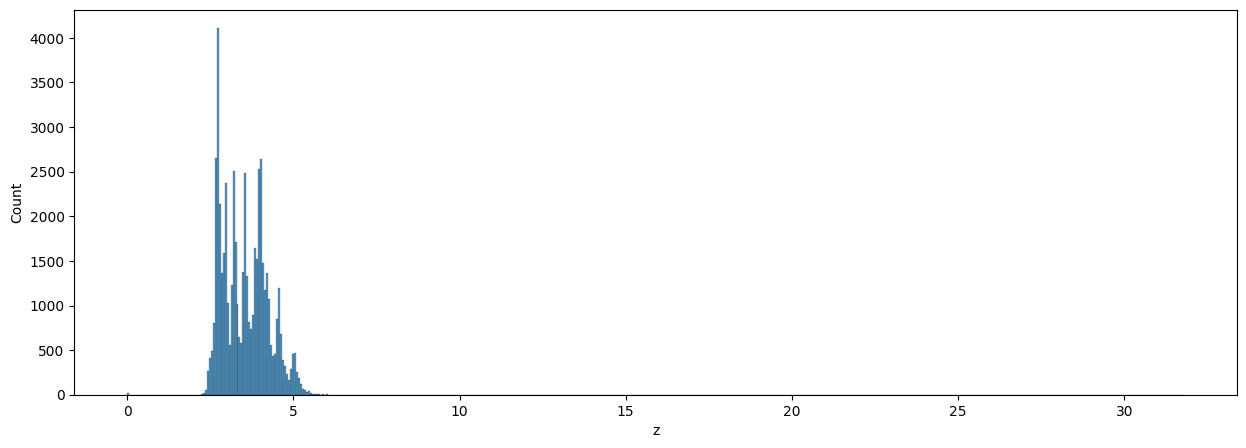

In [142]:
plt.figure(figsize = (15,5))
sns.histplot(x= 'z', data = data)
plt.show()

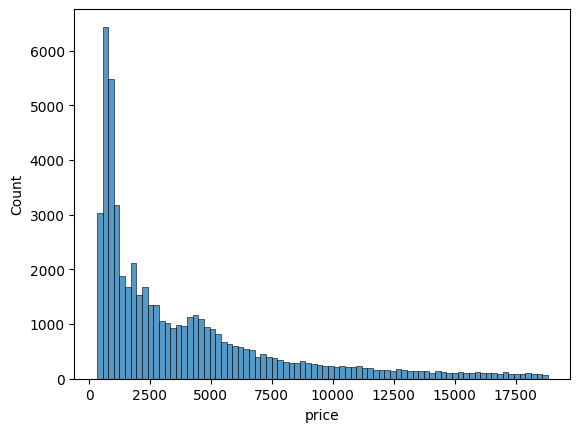

In [143]:
plt.Figure(figsize=(15,5))
sns.histplot(x= 'price',data = data)
plt.show()

From the plotting of numerical variable we can infer the distribution pattern of the various variable:

depth seems to be normally distributed across its average.
table seems to be skewed toward right.
z follows a random distribution.
price can be said to be following chi-squared distribution.

In [144]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [145]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [146]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [147]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

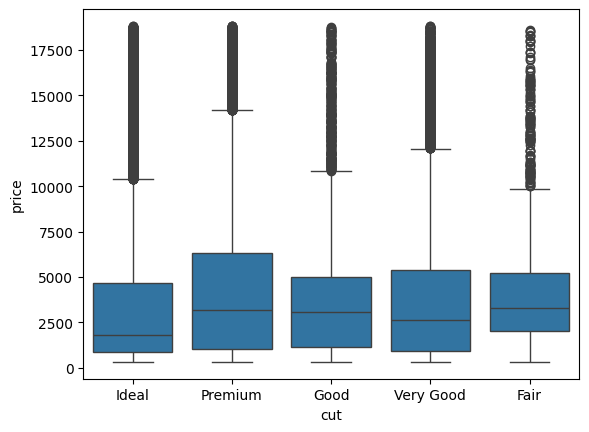

In [148]:
plt.Figure(figsize=(15,5))
sns.boxplot(x = 'cut', y = 'price', data = data)
plt.show()

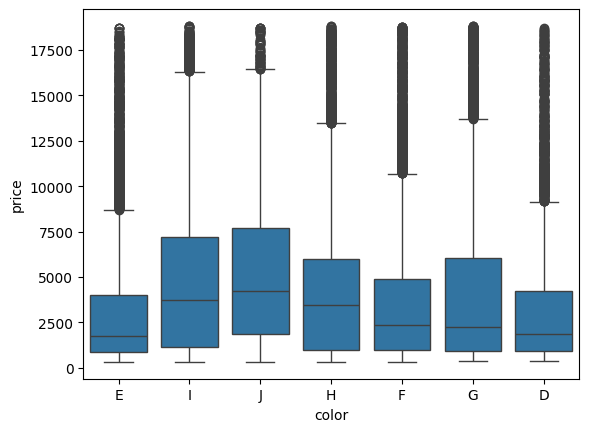

In [149]:
plt.Figure(figsize = (15,5))
sns.boxplot(x = 'color',y ='price', data = data)
plt.show()


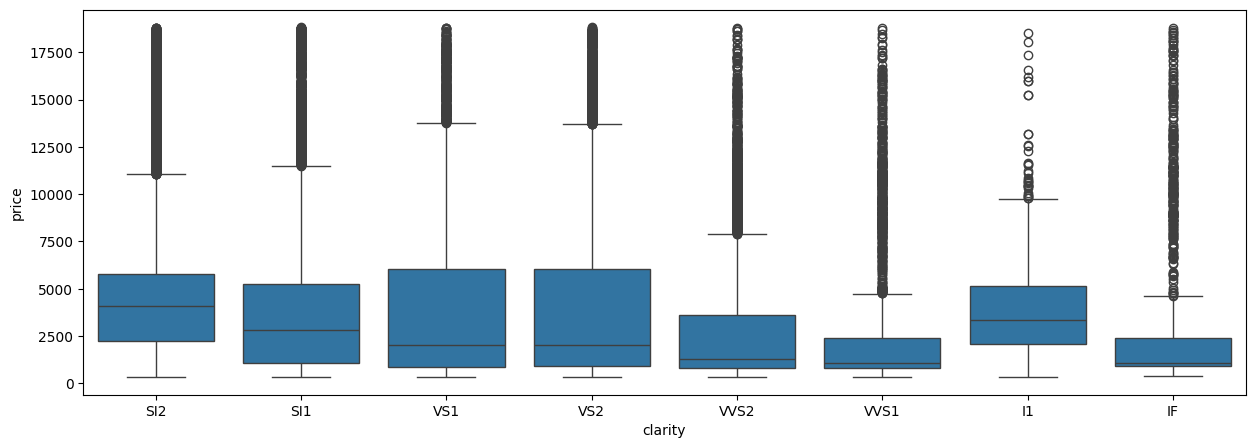

In [150]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'clarity',y = 'price', data = data)
plt.show()

After plotting the box plot for the categorical data, we can conclude that every entity has a outlier present init. These outlier can be trimmed if required.




Inference from box plots:

The average price of the diamond with ideal cut is lowest while the other have similar average price.
The price of daimond varies with respect to color, here J is most expensive.
In case of clarity SI2 have the highest price.

In [153]:
y = data['price']
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [155]:
rest = data.drop(['price'],axis=1)
rest

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [158]:
# creating dummy varriable for the categorical varriable

x = pd.get_dummies(rest,drop_first=True)
x

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,3.89,3.84,2.31,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,5.69,5.75,3.61,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,5.66,5.68,3.56,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,6.15,6.12,3.74,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


In [159]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [161]:
print(x_train.shape)

(43152, 23)


In [165]:
print(x_test.shape)

(10788, 23)


In [166]:
from sklearn.linear_model import LinearRegression

In [170]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [174]:
y_predict = regression.predict(x_test)
y_predict

array([ 408.4386822 , 1929.77624729,  712.92795373, ..., 2708.79179394,
       2951.28071605, 5563.84963762])

In [177]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
score

0.9205954751655324

he R square value for our model is 83.60%

In [188]:
z = pd.read_csv('C:\\Users\\ATUL\\Desktop\\EDA python\\machine learning\\sales.txt')
z

,12.0 15.0
0,20.5 16.0
1,21.0 18.0
2,15.5 27.0
3,15.3 21.0
4,23.5 49.0
5,24.5 21.0
6,21.3 22.0
7,23.5 28.0
8,28.0 36.0
9,24.0 40.0
